In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [15]:
credit_data=pd.read_csv("/content/credit_score.csv")

In [16]:
credit_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [17]:
credit_data.shape


(100000, 28)

In [18]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [19]:
credit_data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [20]:
credit_data["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [21]:
credit_data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Annual_Income', ylabel='Credit_Score'>

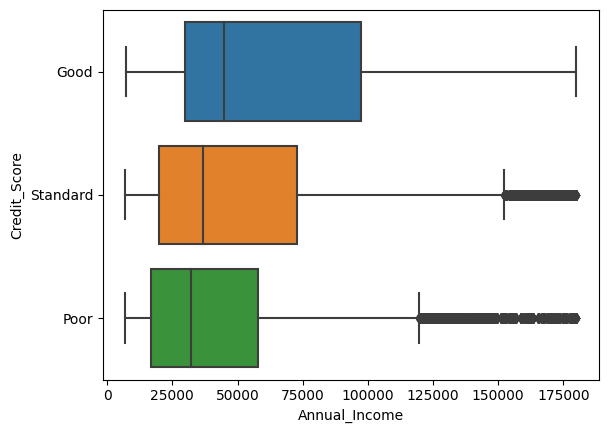

In [23]:
sns.boxplot(x='Annual_Income',y='Credit_Score',data=credit_data)

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Credit_Score'>

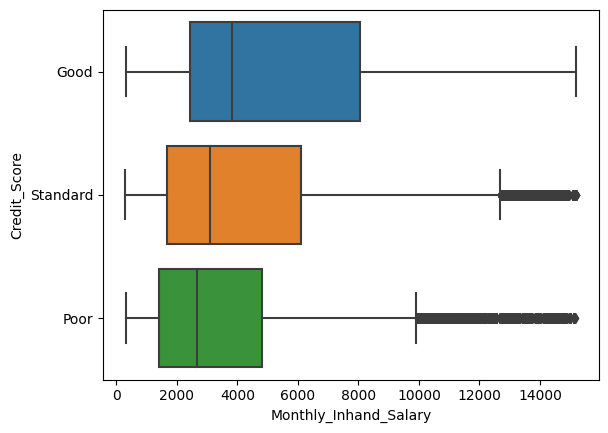

In [24]:
sns.boxplot(x='Monthly_Inhand_Salary',y='Credit_Score',data=credit_data)

<Axes: xlabel='Total_EMI_per_month', ylabel='Credit_Score'>

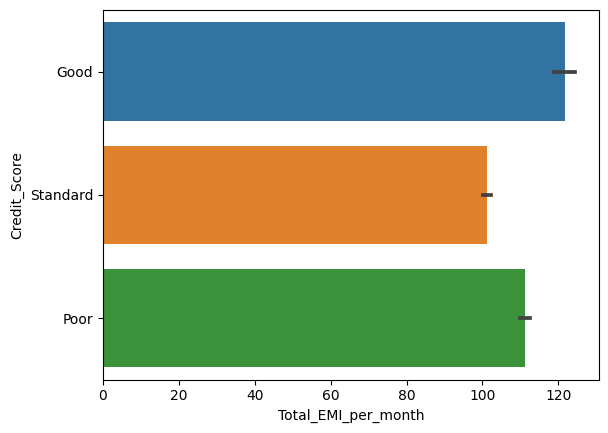

In [25]:
sns.barplot(x='Total_EMI_per_month',y='Credit_Score',data=credit_data)

In [26]:
#encoding
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encode=LabelEncoder()
credit_data["Credit_Mix"]=label_encode.fit_transform(credit_data["Credit_Mix"])
credit_data["Credit_Score"]=label_encode.fit_transform(credit_data["Credit_Score"])
credit_data["Occupation"]=label_encode.fit_transform(credit_data["Occupation"])

In [28]:
credit_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,0


In [29]:
credit_data["Credit_Score"].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [30]:
#seperate data data
x = np.array(credit_data[["Annual_Income", "Monthly_Inhand_Salary","Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y=np.array(credit_data[["Credit_Score"]])

In [31]:
x.shape

(100000, 12)

In [32]:
y.shape


(100000, 1)

In [33]:
#SPLITTING THE DATA FOR TRAINING AND TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
LR_MODEL=LogisticRegression()

In [35]:
LR_MODEL.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
prediction=LR_MODEL.predict(x_test)

In [37]:
score=accuracy_score(prediction,y_test)

In [38]:
score

0.54155

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF_MODEL=RandomForestClassifier()

In [41]:
RF_MODEL.fit(x_train,y_train)

<ipython-input-41-e345773f51f7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_MODEL.fit(x_train,y_train)


RandomForestClassifier()

In [42]:
RF_prediction= RF_MODEL.predict(x_test)

In [43]:
RF_score=accuracy_score(RF_prediction,y_test)

In [44]:
RF_score

0.81375

 MODEL TESTING

In [45]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
Result= RF_MODEL.predict(features)
print("Predicted Credit Score = ",Result)

if Result==0:
  print("credit score:Good")
elif Result==1:
  print("credit score: poor")
else:
  print("credit score: standard")


Credit Score Prediction : 
Annual Income: 19114
Monthly Inhand Salary: 1824
Number of Bank Accounts: 3
Number of Credit cards: 4
Interest rate: 3
Number of Loans: 4
Average number of days delayed by the person: 3
Number of delayed payments: 7
Credit Mix (Bad: 0, Standard: 1, Good: 3) : 0
Outstanding Debt: 809
Credit History Age: 265
Monthly Balance: 312.4
Predicted Credit Score =  [0]
credit score:Good
